In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.ndimage.interpolation import zoom

In [4]:
data = loadmat('./data/data.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'I_HS', 'I_MSI', 'I_REF'])

In [6]:
I_REF, I_HS, I_MS = data['I_REF'], data['I_HS'], data['I_MSI']

In [7]:
print(I_REF.shape, I_HS.shape, I_MS.shape)

(420, 300, 191) (84, 60, 191) (420, 300, 4)


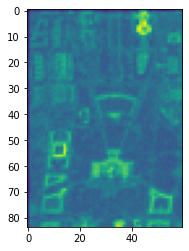

In [8]:
plt.figure('test')
plt.imshow(I_HS[:,:,0])
plt.show()

In [9]:
# 生成训练数据和测试数据
# HS上采样，大小和MS保持一致
I_HS2 = zoom(I_HS, zoom=(5,5,1), order=1) 
# 将HS和MS拼接
dataset = np.concatenate((I_HS2, I_MS), axis=2) # 420*300*195
print(dataset.shape)

(420, 300, 195)


In [10]:
# 将HS和MS拼接后的图像按照step=1切割成200*200的图像集，类似的切割I_REF
input_size = (100,100,195)
tem1 = []
tem2 = []
for i in range(420-input_size[0]+1):
    for j in range(300-input_size[1]+1):
        tem1.append(dataset[i:i+input_size[0],j:j+input_size[1],:])
        tem2.append(I_REF[i:i+input_size[0],j:j+input_size[1],:])
print(len(tem1))
print(len(tem2))
print(tem1[0].shape)

64521
64521
(100, 100, 195)


In [11]:
h_bands = 191
m_bands = 4
l_r = 0.0001


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, 9,padding='same', activation='relu', input_shape=input_size),
    tf.keras.layers.Conv2D(32, 5,padding='same', activation='relu'),
    tf.keras.layers.Conv2D(h_bands, 5, padding='same')
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr = l_r), loss = 'mse', metrics = ['mse'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1010944   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      51232     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 191)     152991    
Total params: 1,215,167
Trainable params: 1,215,167
Non-trainable params: 0
_________________________________________________________________


In [13]:
train_data = np.array(tem1[:50])
train_label = np.array(tem2[:50])
print(f'train_data:{train_data.shape}, train_label:{train_label.shape}')

train_data:(50, 100, 100, 195), train_label:(50, 100, 100, 191)


In [15]:
model.fit(train_data,train_label,epochs=200)

Epoch 1/200
2/2 [==============================] - 11s 6s/step - loss: 8478802.0000 - mse: 8478802.0000
Epoch 2/200
2/2 [==============================] - 11s 6s/step - loss: 7735472.5000 - mse: 7735472.5000
Epoch 3/200
2/2 [==============================] - 11s 6s/step - loss: 6961369.0000 - mse: 6961369.0000
Epoch 4/200
2/2 [==============================] - 11s 6s/step - loss: 6064587.0000 - mse: 6064587.0000
Epoch 5/200
2/2 [==============================] - 11s 5s/step - loss: 5222998.0000 - mse: 5222998.0000
Epoch 6/200
2/2 [==============================] - 11s 6s/step - loss: 4397519.5000 - mse: 4397519.0000
Epoch 7/200
2/2 [==============================] - 11s 6s/step - loss: 3708833.5000 - mse: 3708833.7500
Epoch 8/200
2/2 [==============================] - 12s 6s/step - loss: 3146140.2500 - mse: 3146140.0000
Epoch 9/200
2/2 [==============================] - 11s 6s/step - loss: 2676816.7500 - mse: 2676816.5000
Epoch 10/200
2/2 [==============================] - 11s 6s/step 

In [18]:
model.save('./pcnn_model.h5') 

In [23]:
model.evaluate(np.array(tem1[-10:]), np.array(tem2[-10:]),verbose=0)

[853157.625, 853157.5625]

In [24]:
train1 = np.array(tem1[-10:])
ref1 = np.array(tem2[-10:])

In [26]:
train1.shape, ref1.shape

((10, 100, 100, 195), (10, 100, 100, 191))

In [30]:
model.predict(train1[[0]]).shape

(1, 100, 100, 191)

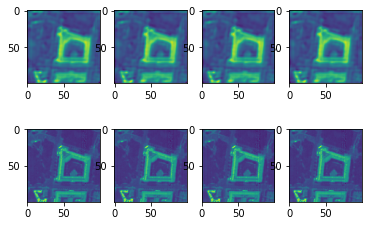

In [33]:
plt.figure()
for i in range(1,5,1):
    plt.subplot(2,4,i)
    plt.imshow(model.predict(train1[[i]])[0,:,:,0])
    plt.subplot(2,4,i+4)
    plt.imshow(ref1[i,:,:,0])
plt.show()

In [34]:
model.fit??

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Source:   
  @enable_multi_worker
  def fit(self,
          x=None,
          y=None,
          batch_size=None,
          epochs=1,
          verbose=1,
          callbacks=None,
          validation_split=0.,
          validation_data=None,
          shuffle=True,
          class_weight=None,
          sample_weight=None,
          initial_epoch=0,
          steps_per_epoch=None,
          validation_steps=None,
          validation_batch_size=None,
          validation_freq=1,
          max_queue_size=10,
          workers=1,
          use_multiprocessing=Fa